<a href="https://colab.research.google.com/github/AgustinSiben/AprMaq/blob/main/Trabajo_Practico_2_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

Se graficaron todas las curvas, algunas de estas fueron eliminadas debido a la poca información que mostraban. Por ejemplo las camas de hospilates qeu no tuvieron cambios a lo largo de todos los datos, simplemente seria mejor mencionarr cuantas camas existieron y no tener un dataset temporar sobre ese valor. Lo mismo sucedia con los aprehendidos y otros mas que estan mencionados en los comentario. Si bien lo datos no fueron graficados, estos se guardaron por si llegaran a ser de utilidad.

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

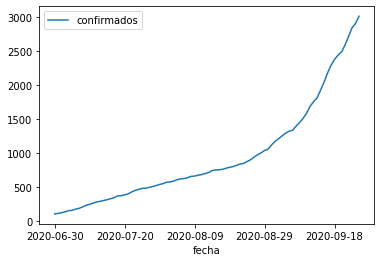

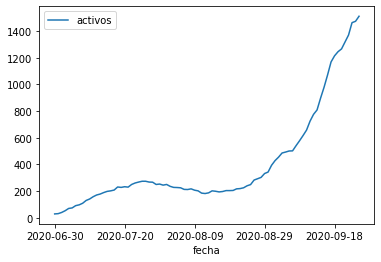

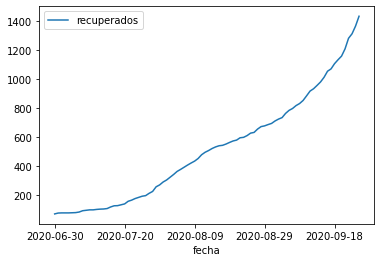

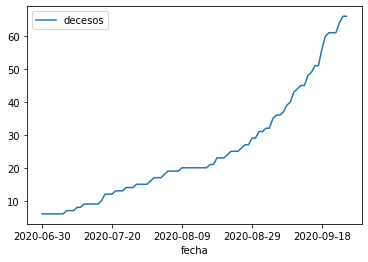

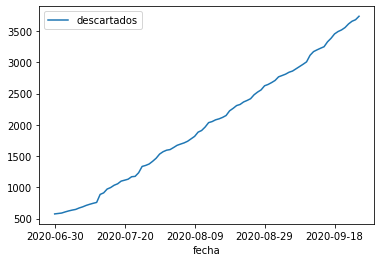

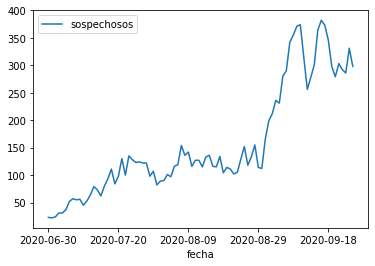

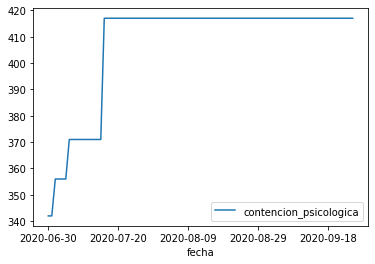

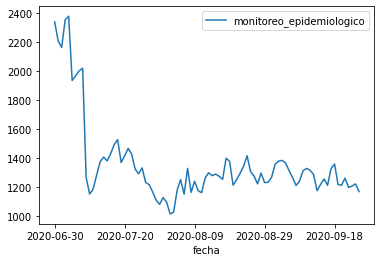

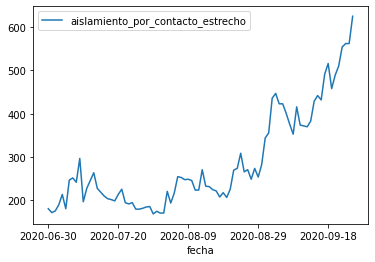

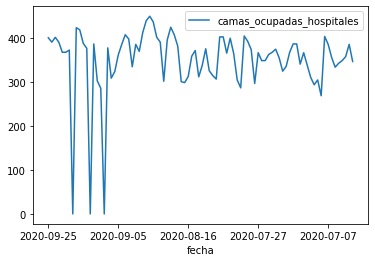

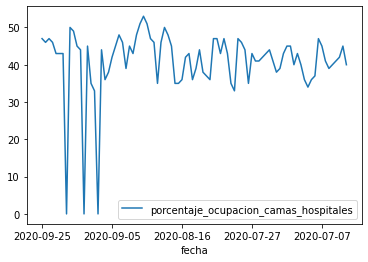

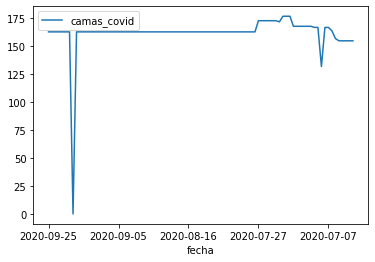

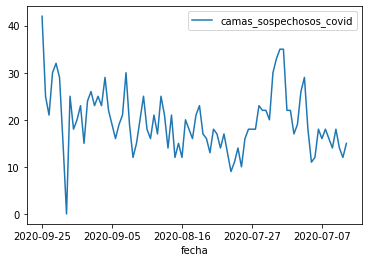

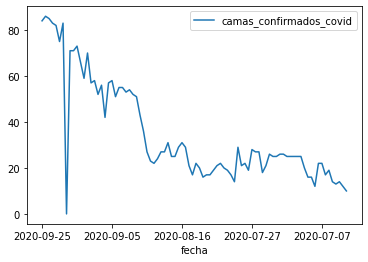

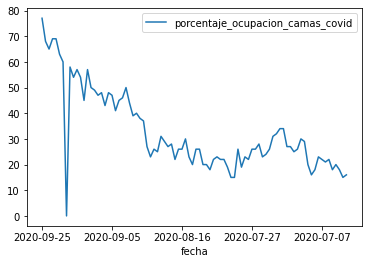

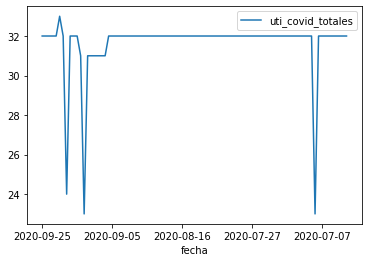

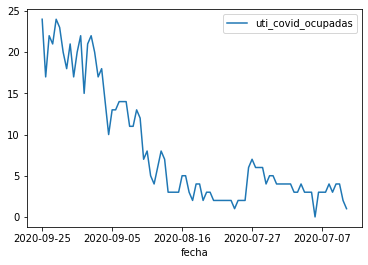

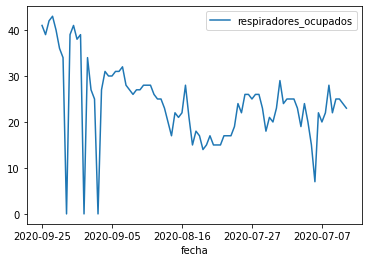

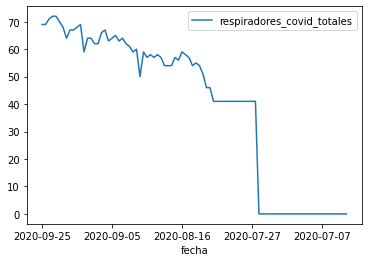

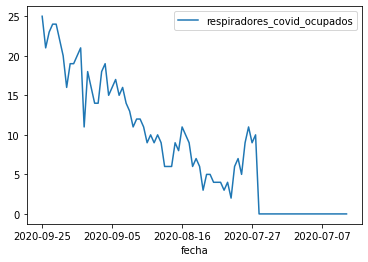

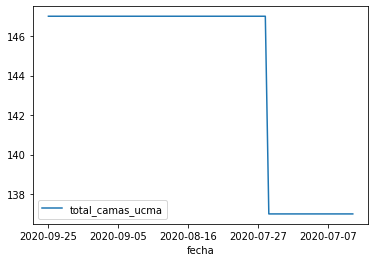

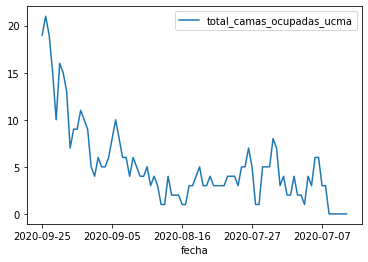

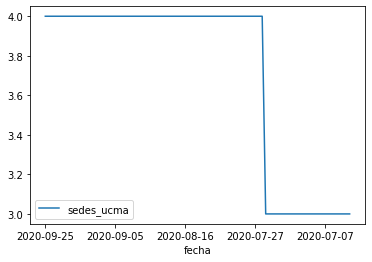

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_CasosCovid = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv')
df_CamasCovid = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv')


#Elimino Aphendidos porque es cero, simplemente se puede mencionar sin poner un gráficos

df_DatosEliminadosCasosCovid = pd.DataFrame()
df_DatosEliminadosCasosCovid['aprehendidos'] = df_CasosCovid['aprehendidos']
del df_CasosCovid['aprehendidos']
columnas_CasosCovid = df_CasosCovid.columns

for i in range(len(columnas_CasosCovid) - 1):
    df_CasosCovid.plot.line(y=df_CasosCovid.columns[i+1], x = 'fecha')

#   Elimino observaciones porque no se puede graficar, simplemente se puede mencionar sin poner un gráficos
#   Elimino los el número de informes ya que son el equivalente a ver la fecha y es una funcion lineal, porque
#       salian informes cada cierto tiempo
#   Elimino la cantidad de camas en hospotales porque son constantes, con algun pequeño ambio insignificante. Lo mismo con los respiradores
#       Guardo los datos para no perderlos
df_DatosEliminadosCamasCovid = pd.DataFrame()
df_DatosEliminadosCamasCovid['observaciones'] = df_CamasCovid['observaciones']
del df_CamasCovid['observaciones']
df_DatosEliminadosCamasCovid['informeNumero'] = df_CamasCovid['informeNumero']
del df_CamasCovid['informeNumero']
df_DatosEliminadosCamasCovid['total_camas_hospitales'] = df_CamasCovid['total_camas_hospitales']
del df_CamasCovid['total_camas_hospitales']
df_DatosEliminadosCamasCovid['respiradores_totales'] = df_CamasCovid['respiradores_totales']
del df_CamasCovid['respiradores_totales']
columnas_CamasCovid = df_CamasCovid.columns

for i in range(len(columnas_CamasCovid) - 1):
  df_CamasCovid.plot.line(y=df_CamasCovid.columns[i+1], x = 'fecha')
 


#Ejercicio 2

##Datasets e Histogramas

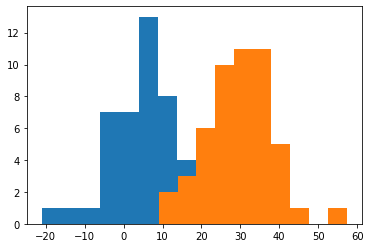

In [116]:
#Creo dos dataframes de con distribución normal y distintas caracteristicas
muA, sigmaA = 5, 10 # Media y desviación estandar
muB, sigmaB = 30,10
n = 50 #Cantidad de valores
a = np.random.normal(muA, sigmaA, n)
b = np.random.normal(muB, sigmaB, n)

a = pd.DataFrame({'Etiqueta' : 'A', 'Val.': a})
b = pd.DataFrame({'Etiqueta' : 'B', 'Val.': b})
plt.hist(a['Val.'])
plt.hist(b['Val.'])
df = a.append(b, ignore_index=True)
#Ordeno el dataframe
df.sort_values('Val.', inplace=True, ignore_index=True)


##Curva ROC

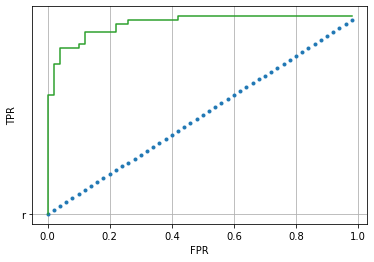

In [117]:
#Armamos una columna nueva con las etiquetas que predecimos
df['Etiqueta Predecida'] = '' #Supongo que la predicción da todas como A
#Creo la curva de identidad con un linespace
identidad = np.arange(0,1,1/n)
plt.plot(identidad,identidad,'.','r')
x = np.zeros(2*n)
y = np.zeros(2*n)

for i in range(2*n - 1):
    if (df.iloc[i,0] == 'A'):
        y[i+1] = y[i] + 1/n
        x[i+1] = x[i]
    else:
        x[i+1] = x[i] + 1/n
        y[i+1] = y[i]
        
plt.plot(x, y)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid('true')


Ahora que tengo la curva ROC calculo el punto de mayor distancia y lo tomo como umbral

In [118]:
#Calculo la distancia máxima

distancia = np.sqrt(np.abs(x-((x+y)/2))+np.abs(y-((x+y)/2)))
[umbrales] = np.where(distancia == distancia.max())
#Puede ser que exista mas de un punto donde la distancia sea máxima en ese caso hay que analizar cual es conveniente
#Elijo el primero
umbral = df.iloc[umbrales[0],1]
print('El umbral es: ')
print(umbral)
#Creo una nueva columna en el dataframe y le asigno el valor dependiendo la curva ROC
df['Etiqueta Predecida'] = ['A' if df.iloc[i,1] < umbral else 'B' for i in range(2*n)]
df.sample(10)

El umbral es: 
17.066049252865177


,Etiqueta,Val.,Etiqueta Predecida
10,A,-0.600878,A
83,B,34.345279,B
41,A,14.827117,A
69,B,28.231109,B
36,A,12.470514,A
37,A,12.754623,A
65,B,27.915120,B
60,B,26.388217,B
90,B,37.046884,B
95,B,39.118212,B


##Observamos los aciertos y errores en la prediccón:

In [119]:
#Supongo A como negativo y B como positivo

df['Tipo de Error'] = ['FP' if df.iloc[i,0]=='A' and df.iloc[i,2]=='B' else #Falso positivo
                            'FN' if df.iloc[i,0]=='B' and df.iloc[i,2]=='A' else #Falso negativo
                            'VP' if df.iloc[i,0]=='B' and df.iloc[i,2]=='B' else #Verdadero positivo
                            'VN' for i in range(2*n)]   #Verdadero negativo
df.sample(10)

,Etiqueta,Val.,Etiqueta Predecida,Tipo de Error
21,A,5.997895,A,VN
80,B,32.161080,B,VP
58,A,23.601772,B,FP
61,A,27.492532,B,FP
69,B,28.231109,B,VP
45,B,18.005615,B,VP
47,A,19.002062,B,FP
74,B,30.221385,B,VP
55,B,23.034949,B,VP
84,B,34.408236,B,VP


##Calculo la relacion entre cada uno de los valores obtenidos

In [120]:
fp, fn, vp, vn = [np.sum(df['Tipo de Error'] == TdE) for TdE in ['FP', 'FN', 'VP', 'VN']]

TPR = vp/(vp+fn)
FPR = fp/(fp+vn)
PPV = vp/(vp+fp)
f = 2*TPR*PPV/(TPR+PPV)

print('TPR:', np.round(TPR, 2))
print('FPR:', np.round(TPR, 2))
print('PPV:', np.round(PPV, 2))
print('F:', np.round(f, 2))

TPR: 0.96
FPR: 0.96
PPV: 0.86
F: 0.91


Se puede ver, cambiando la variancia y valor medio que mientras mas separados esten los dos grupos de datos más sensillo es hacer la predicción y cuando mas juntos existen mayor cantidad de errores. Esto es algo bastante intuitivo que suceda, en el ejemplo de las mandarinas y naranjas, mientras mas distintas sean mas facil serán de reconocer y habrá menos errores.